In [1]:
import pandas as pd
import numpy as np
from time import time
from datetime import datetime
# import pymysql
import pandas.io.sql as psql
import sqlalchemy
from datetime import date
import json
import math
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)
matplotlib.rcParams['figure.figsize'] = [30, 30]

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
df = pd.read_csv("vip_formated_data.csv", index_col=None)

### Sample from Data Frame

In [3]:
df.head()

,merchant_id,user_id,amount_spent,visits
0,1559,149057,10260,23.0
1,1559,560560,10147,22.0
2,1559,356060,10157,55.0
3,1559,85626,10204,33.0
4,1559,564801,10055,30.0


## Merchant Analysis

### Basic stats for merchants

1. Average number of VIP customers per merchant
2. Max number of VIP customers in any merchant
3. Min number of VIP customers in any merchants
4. Median number of VIP customers

In [4]:
len(df.merchant_id.unique())

403

In [5]:
print(df.merchant_id.value_counts().mean())
print(df.merchant_id.value_counts().max())
print(df.merchant_id.value_counts().min())
print(df.merchant_id.value_counts().median())

21.337468982630273
709
1
4.0


### Histogram of Number of merchants vs. Number of VIP customers at each merchant

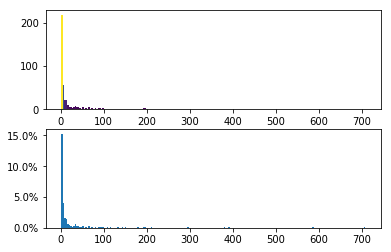

In [6]:
x = df.merchant_id.value_counts()
y = df.merchant_id.value_counts().value_counts()
n_bins = 200

fig, axs = plt.subplots(2, 1)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [7]:
bins = [1,3,5,10,50,100,df.merchant_id.value_counts().max()]
count_list_merch = df.merchant_id.value_counts().index.tolist()
count_list_count = df.merchant_id.value_counts()

In [8]:
for i, count in enumerate(count_list_count):
    if count >= 10 and count<50:
        count_list_count.loc[count_list_merch[i]] = 30
    if count>=50 and count<100:
        count_list_count.loc[count_list_merch[i]] = 75
    if count >= 100 and count<200:
        count_list_count.loc[count_list_merch[i]] = 150
    if count >=200 and count<500:
        count_list_count.loc[count_list_merch[i]] = 350
    if count >= 500:
        count_list_count.loc[count_list_merch[i]] = 500

In [9]:
count_list_count.value_counts()

1      93
30     78
2      58
3      42
4      25
75     22
5      19
7      15
6      14
150    11
9      11
8       9
350     4
500     2
Name: merchant_id, dtype: int64

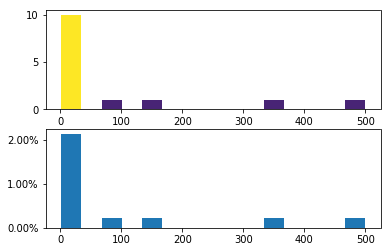

In [10]:
x = count_list_count.value_counts().index
y = count_list_count.value_counts()
n_bins = 15

fig, axs = plt.subplots(2, 1)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

## Customer Analysis

In [11]:
len(df.user_id.value_counts()) < len(df)

True

So we know that some customers are VIPs at multiple chains

In [12]:
print("Number of VIP customers = ", len(df.user_id.unique()))

Number of VIP customers =  8143


In [13]:
print(df.user_id.value_counts().mean())
print(df.user_id.value_counts().max())
print(df.user_id.value_counts().min())
print(df.user_id.value_counts().median())

1.0559990175610954
11
1
1.0


So we can see that most customers are VIPs at only one merchant

### Customers who are VIPs at more than 1 chain

In [14]:
multi_vip = list()

for user in df.user_id.unique().tolist():
    temp = df[df['user_id'] == user]
    if(len(temp)>1):
        multi_vip.append(user)

In [15]:
multi_vip_df = df.loc[df.user_id.isin(multi_vip)]

In [16]:
multi_vip_df.head()

,merchant_id,user_id,amount_spent,visits
2,1559,356060,10157,55.0
4,1559,564801,10055,30.0
25,1442,207682,7209,14.0
29,102,641841,10035,29.0
30,102,60777,10000,30.0


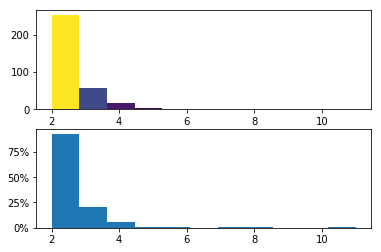

In [17]:
x = multi_vip_df.user_id.value_counts()
y = multi_vip_df.user_id.value_counts().value_counts()
n_bins = 11

fig, axs = plt.subplots(2, 1)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

## Visit Analysis

In [18]:
print(df.visits.mean())
print(df.visits.max())
print(df.visits.min())

11.89308814204185
220.0
1.0


In [19]:
len(df[df.visits == 1].user_id.unique())

577

577 customers became VIPs at 584 merchants within 1 visit

In [20]:
len(df.user_id.unique())

8143

### Top 126 customers have >=50 visits

In [21]:
visit_hlpp_candidates = df.sort_values(by='visits', ascending=False).head(126)

In [22]:
len(visit_hlpp_candidates.user_id.unique())

124

In [23]:
visit_hlpp_candidates = df.sort_values(by='visits', ascending=False).head(517)

## Amount Analysis

In [24]:
df = df.dropna()
print(df.amount_spent.sum()/len(df.user_id.unique()))
print(df.amount_spent.max())
print(df.amount_spent.min())

14928.729521276597
715625
400


In [25]:
df[df.amount_spent == 10]

,merchant_id,user_id,amount_spent,visits


# This is super weird

In [26]:
amount_hlpp_canditates = df.sort_values(by=['amount_spent'], ascending=False).head(126)

In [27]:
df.sort_values(by=['amount_spent'], ascending=False).head(5)

,merchant_id,user_id,amount_spent,visits
6678,1266,506009,715625,3.0
6667,1266,560671,602247,4.0
6658,1266,571278,594750,11.0
6672,1266,412933,580320,6.0
6668,1266,253917,579775,20.0


### Clearly there is a big discrepancy between amount and visits, so I am finding intersecting customers

In [28]:
intersection_hlpp_candidates = pd.merge(visit_hlpp_candidates, amount_hlpp_canditates, how='inner', on=['user_id'])

In [29]:
intersection_hlpp_candidates

,merchant_id_x,user_id,amount_spent_x,visits_x,merchant_id_y,amount_spent_y,visits_y
0,1266,425996,521405,42.0,1266,521405,42.0
1,259,43612,509771,34.0,259,509771,34.0
2,835,106885,50900,34.0,835,50900,34.0
